In [199]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
# from pandas_profiling import ProfileReport
from pandas.plotting import scatter_matrix
import pm4py
from pm4py.objects.log.util.log import project_traces
from pm4py.objects.log.util import interval_lifecycle
import zipfile


import warnings
warnings.filterwarnings("ignore")

# Trace Analysis & Filtering (PM4PY)
- https://pm4py.fit.fraunhofer.de/documentation


In [200]:
# function to print any trace (index) from log
def print_nth(log, index):
    print(str(project_traces(log)[index]))

In [201]:
# loading bpi zip (raw log data) and convert to event log object
# read data in csv 
zf = zipfile.ZipFile('../data/BPI_Challenge_2017_filtered.zip') 
bpi = pd.read_csv(zf.open('BPI_Challenge_2017.csv'), sep=',')
bpi_log = pm4py.format_dataframe(bpi, case_id='Case ID', activity_key='Activity', timestamp_key='Start Timestamp')
bpi_log = pm4py.convert_to_event_log(bpi_log)


In [202]:
# check all starting activities
log_start = pm4py.get_start_activities(bpi_log)
log_start

{'A_Create Application': 12380}

In [203]:
# number of distinct trace variants
len(pm4py.get_variants_as_tuples(bpi_log))

107

In [204]:
# how does the process end
pm4py.get_end_activities(bpi_log)

{'O_Cancelled': 7224, 'A_Pending': 4394, 'O_Refused': 762}

In [205]:
# print 1st trace
print_nth(bpi_log, 0)

['A_Create Application', 'A_Submitted', 'A_Concept', 'A_Accepted', 'O_Create Offer', 'O_Created', 'O_Sent (mail and online)', 'A_Complete', 'A_Cancelled', 'O_Cancelled']


In [206]:
# convert log to dataframe and save
df = pm4py.convert_to_dataframe(bpi_log)
df.head(25)

concept:name  Resource                   time:timestamp  \
0       A_Create Application    User_1 2016-08-03 17:57:21.673000+00:00   
1                A_Submitted    User_1 2016-08-03 17:57:21.734000+00:00   
2                  A_Concept    User_1 2016-08-03 17:58:28.299000+00:00   
3                 A_Accepted    User_5 2016-08-05 15:57:07.419000+00:00   
4             O_Create Offer    User_5 2016-08-05 15:59:57.320000+00:00   
5                  O_Created    User_5 2016-08-05 15:59:58.162000+00:00   
6   O_Sent (mail and online)    User_5 2016-08-05 16:01:23.264000+00:00   
7                 A_Complete    User_5 2016-08-05 16:01:23.288000+00:00   
8                A_Cancelled    User_1 2016-09-05 08:00:36.710000+00:00   
9                O_Cancelled    User_1 2016-09-05 08:00:36.829000+00:00   
10      A_Create Application    User_1 2016-06-02 12:14:26.844000+00:00   
11               A_Submitted    User_1 2016-06-02 12:14:26.885000+00:00   
12                 A_Concept    User_1 2016-06-02 12:15:36.773000+00:00   
13    W_Complete application   User_32 2016-06-06 10:02:16.549000+00:00   
14                A_Accepted   User_32 2016-06-06 10:10:07.694000+00:00   
15            O_Create Offer   User_32 2016-06-06 10:12:02.402000+00:00   
16                 O_Created   User_32 2016-06-06 10:12:03.657000+00:00   
17  O_Sent (mail and online)   User_32 2016-06-06 10:16:46.835000+00:00   
18                A_Complete   User_32 2016-06-06 10:16:46.892000+00:00   
19              A_Validating  User_118 2016-06-09 11:54:36.870000+00:00   
20                O_Returned  User_118 2016-06-09 11:55:13.652000+00:00   
21                O_Accepted   User_90 2016-06-10 13:02:01.275000+00:00   
22                 A_Pending   User_90 2016-06-10 13:02:01.278000+00:00   
23      A_Create Application   User_71 2016-04-04 17:56:37.675000+00:00   
24    W_Complete application   User_71 2016-04-04 17:56:37.693000+00:00   

                 Complete Timestamp    Variant  Variant index  \
0  2016-08-03 17:57:21.673000+00:00  Variant 2              2   
1  2016-08-03 17:57:21.734000+00:00  Variant 2              2   
2  2016-08-03 17:58:28.299000+00:00  Variant 2              2   
3  2016-08-05 15:57:07.419000+00:00  Variant 2              2   
4  2016-08-05 15:59:57.320000+00:00  Variant 2              2   
5  2016-08-05 15:59:58.162000+00:00  Variant 2              2   
6  2016-08-05 16:01:23.264000+00:00  Variant 2              2   
7  2016-08-05 16:01:23.288000+00:00  Variant 2              2   
8  2016-09-05 08:00:36.710000+00:00  Variant 2              2   
9  2016-09-05 08:00:36.829000+00:00  Variant 2              2   
10 2016-06-02 12:14:26.844000+00:00  Variant 5              5   
11 2016-06-02 12:14:26.885000+00:00  Variant 5              5   
12 2016-06-02 12:15:36.773000+00:00  Variant 5              5   
13 2016-06-06 10:16:46.869000+00:00  Variant 5              5   
14 2016-06-06 10:10:07.694000+00:00  Variant 5              5   
15 2016-06-06 10:12:02.402000+00:00  Variant 5              5   
16 2016-06-06 10:12:03.657000+00:00  Variant 5              5   
17 2016-06-06 10:16:46.835000+00:00  Variant 5              5   
18 2016-06-06 10:16:46.892000+00:00  Variant 5              5   
19 2016-06-09 11:54:36.870000+00:00  Variant 5              5   
20 2016-06-09 11:55:13.652000+00:00  Variant 5              5   
21 2016-06-10 13:02:01.275000+00:00  Variant 5              5   
22 2016-06-10 13:02:01.278000+00:00  Variant 5              5   
23 2016-04-04 17:56:37.675000+00:00  Variant 3              3   
24 2016-04-04 18:15:45.563000+00:00  Variant 3              3   

   lifecycle:transition  EventOrigin                 EventID       Action  \
0              complete  Application  Application_1000086665      Created   
1              complete  Application     ApplState_161925113  statechange   
2              complete  Application     ApplState_385184570  statechange   
3              complete  Application     ApplState_856156982  stat

## Process Discovery

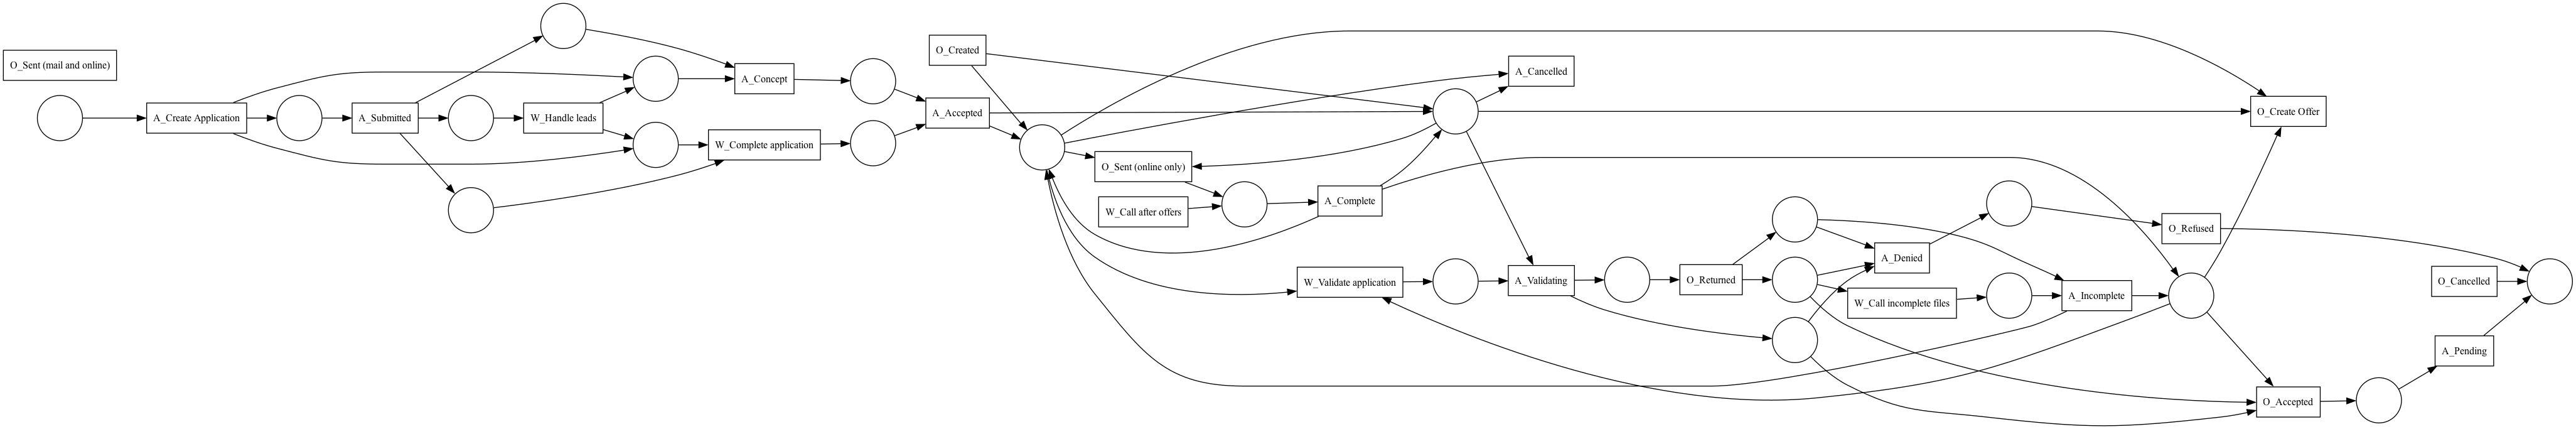

In [207]:
# alpha miner - net (places and transactions)
# general way to visualize net or tree or graph in pm4py - pm4py.view_{petri_net/tree/...}
net, initial_marking, final_marking = pm4py.discover_petri_net_alpha(bpi_log)
pm4py.view_petri_net(net)

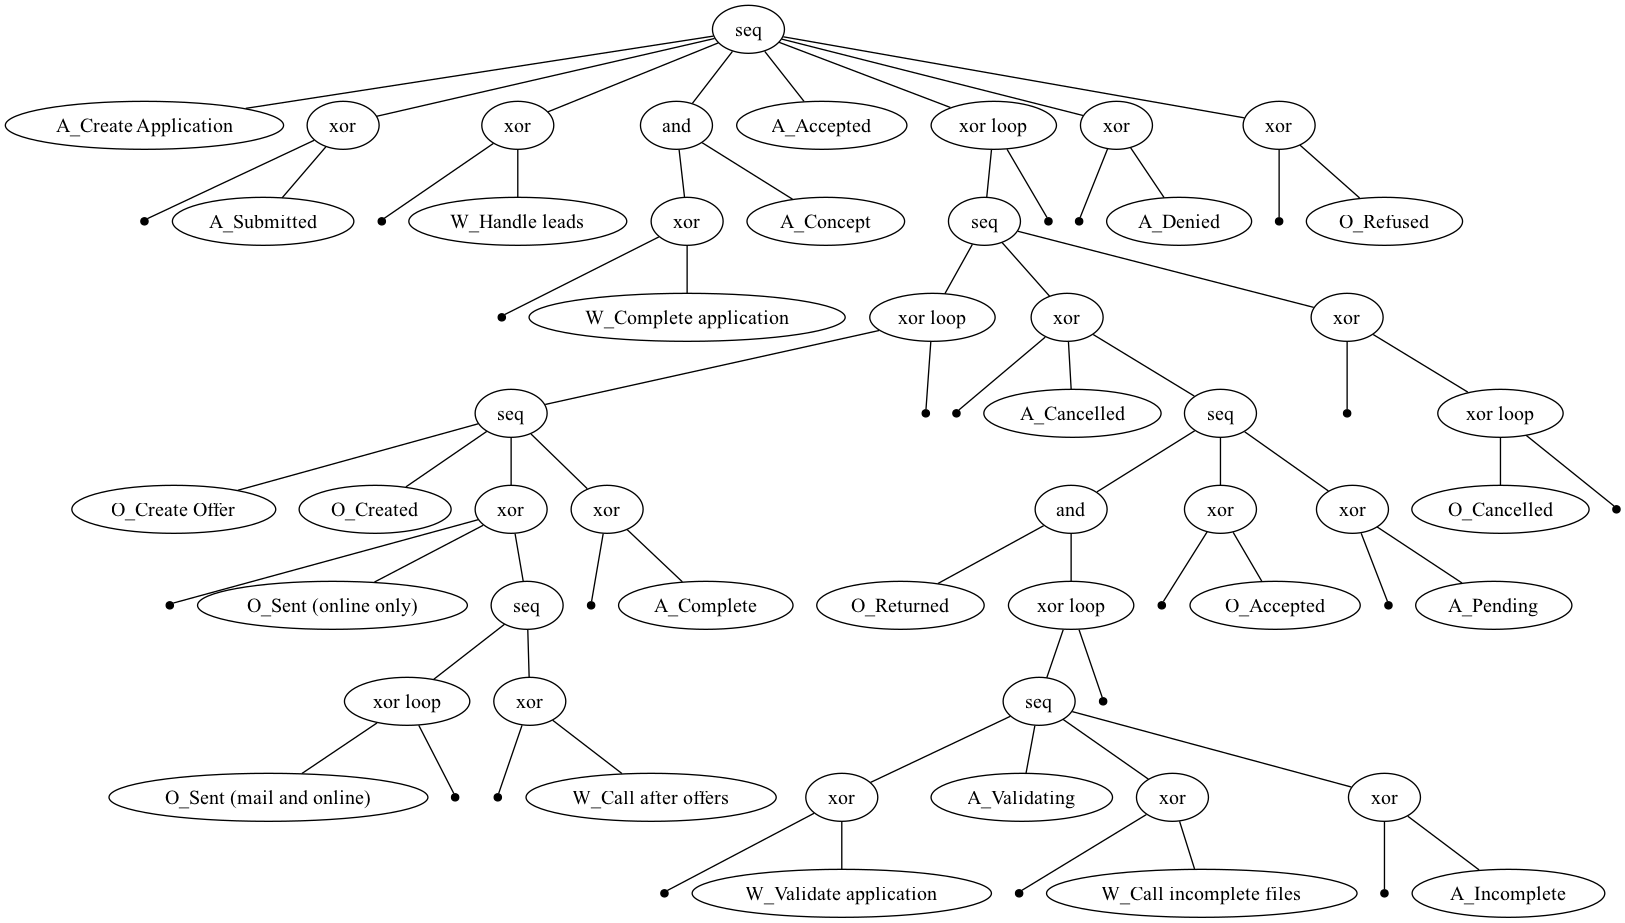

In [208]:
# inductive miner algoritham, we can plot perocess tree, and can save the net same as alpha miner ((places and transactions))
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(bpi_log)
tree = pm4py.discover_process_tree_inductive(bpi_log)
pm4py.view_process_tree(tree)

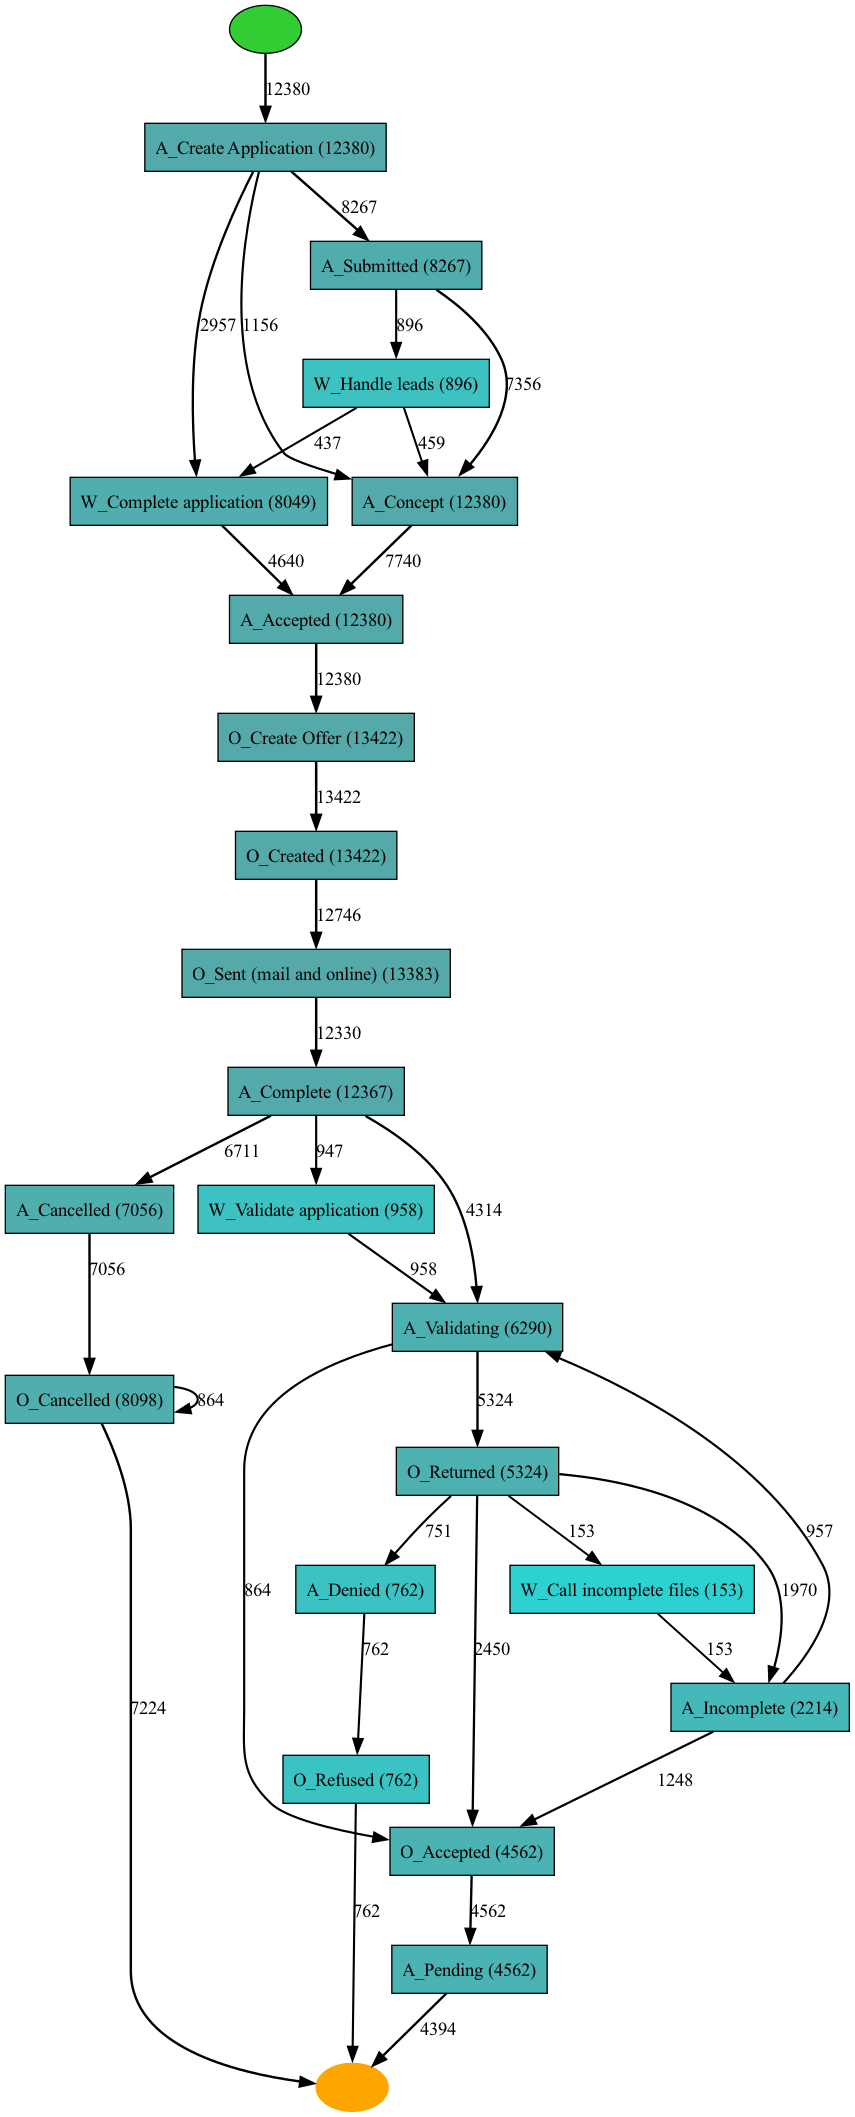

In [209]:
# huristic miner
heu_net = pm4py.discover_heuristics_net(bpi_log, dependency_threshold=0.99)
pm4py.view_heuristics_net(heu_net)

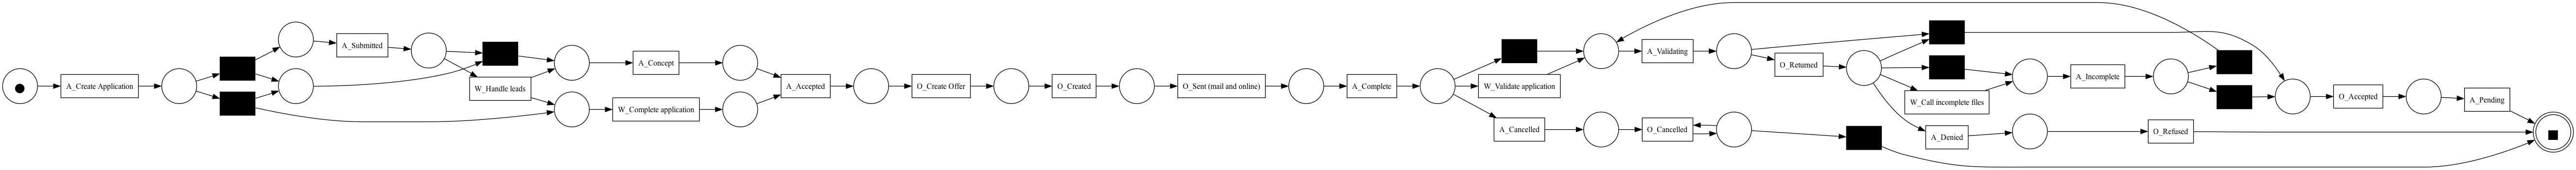

In [210]:
# create and view petri net of huristic miner
net, im, fm = pm4py.discover_petri_net_heuristics(bpi_log, dependency_threshold=0.99)
pm4py.view_petri_net(net, im, fm)

In [211]:
# plotting directly followes graph
# dfg, start_activities, end_activities = pm4py.discover_dfg(trace_log) # dfg with edge number
performance_dfg, start_activities, end_activities = pm4py.discover_performance_dfg(bpi_log) # dfg with duration
# pm4py.save_vis_performance_dfg(performance_dfg, start_activities, end_activities, 'perf_dfg.svg') # to save image, performance dfg can only be saved and then viewed  
# pm4py.view_dfg(performance_dfg, start_activities, end_activities)

# ====================================================

# Data Analysis (Python)

In [212]:
# read data in csv 
zf = zipfile.ZipFile('../data/BPI_Challenge_2017_filtered.zip') 
trace = pd.read_csv(zf.open('BPI_Challenge_2017.csv'), sep=',')
trace.head(25)

Case ID                  Activity  Resource  \
0   Application_652823628      A_Create Application    User_1   
1   Application_652823628               A_Submitted    User_1   
2   Application_652823628                 A_Concept    User_1   
3   Application_652823628                A_Accepted   User_52   
4   Application_652823628            O_Create Offer   User_52   
5   Application_652823628                 O_Created   User_52   
6   Application_652823628  O_Sent (mail and online)   User_52   
7   Application_652823628                A_Complete   User_52   
8   Application_652823628              A_Validating  User_117   
9   Application_652823628                O_Returned  User_117   
10  Application_652823628              A_Incomplete  User_115   
11  Application_652823628              A_Validating  User_117   
12  Application_652823628                O_Accepted  User_115   
13  Application_652823628                 A_Pending  User_115   
14  Application_828200680      A_Create Application    User_1   
15  Application_828200680               A_Submitted    User_1   
16  Application_828200680                 A_Concept    User_1   
17  Application_828200680    W_Complete application   User_19   
18  Application_828200680                A_Accepted   User_19   
19  Application_828200680            O_Create Offer   User_19   
20  Application_828200680                 O_Created   User_19   
21  Application_828200680  O_Sent (mail and online)   User_19   
22  Application_828200680                A_Complete   User_19   
23  Application_828200680               A_Cancelled    User_1   
24  Application_828200680               O_Cancelled    User_1   

            Start Timestamp       Complete Timestamp     Variant  \
0   2016-01-01 10:51:15.304  2016-01-01 10:51:15.304  Variant 16   
1   2016-01-01 10:51:15.352  2016-01-01 10:51:15.352  Variant 16   
2   2016-01-01 10:52:36.413  2016-01-01 10:52:36.413  Variant 16   
3   2016-01-02 12:23:04.299  2016-01-02 12:23:04.299  Variant 16   
4   2016-01-02 12:29:03.994  2016-01-02 12:29:03.994  Variant 16   
5   2016-01-02 12:29:05.354  2016-01-02 12:29:05.354  Variant 16   
6   2016-01-02 12:30:28.606  2016-01-02 12:30:28.606  Variant 16   
7   2016-01-02 12:30:28.633  2016-01-02 12:30:28.633  Variant 16   
8   2016-01-13 14:10:55.973  2016-01-13 14:10:55.973  Variant 16   
9   2016-01-13 14:11:03.569  2016-01-13 14:11:03.569  Variant 16   
10  2016-01-14 10:16:20.974  2016-01-14 10:16:20.974  Variant 16   
11  2016-01-14 14:39:51.556  2016-01-14 14:39:51.556  Variant 16   
12  2016-01-14 16:49:11.416  2016-01-14 16:49:11.416  Variant 16   
13  2016-01-14 16:49:11.420  2016-01-14 16:49:11.420  Variant 16   
14  2016-01-01 14:00:04.360  2016-01-01 14:00:04.360   Variant 1   
15  2016-01-01 14:00:04.398  2016-01-01 14:00:04.398   Variant 1   
16  2016-01-01 14:01:44.671  2016-01-01 14:01:44.671   Variant 1   
17  2016-01-02 12:32:57.796  2016-01-02 12:43:56.259   Variant 1   
18  2016-01-02 12:40:45.797  2016-01-02 12:40:45.797   Variant 1   
19  2016-01-02 12:42:23.751  2016-01-02 12:42:23.751   Variant 1   
20  2016-01-02 12:42:25.106  2016-01-02 12:42:25.106   Variant 1   
21  2016-01-02 12:43:56.242  2016-01-02 12:43:56.242   Variant 1   
22  2016-01-02 12:43:56.271  2016-01-02 12:43:56.271   Variant 1   
23  2016-02-02 08:00:20.734  2016-02-02 08:00:20.734   Variant 1   
24  2016-02-02 08:00:20.837  2016-02-02 08:00:20.837   Variant 1   

    Variant index lifecycle:transition  EventOrigin                EventID  \
0              16             complete  Application  Application_652823628   
1              16             complete  Application   ApplState_1582051990   
2              16             complete  Application    ApplState_642383566   
3              16             complete  Application     ApplState_99568828   
4              16             complete        Offer        Offer_148581083   
5              16             complete        Offer  OfferState_1514834199   
6           

In [213]:

# Identify rows where 'O_Create Offer' is followed by 'O_Created' in the 'Activity' column
mask = (trace['Activity'] == 'O_Create Offer') & (trace['Activity'].shift(-1) == 'O_Created')

for i in range(len(mask)-1):
    if ((not mask[i]) & mask[i+1]):
        trace['OfferID'][i+1] = trace['OfferID'][i+2]


In [214]:
mask = (trace['EventOrigin'] == 'Offer')
eventID = ""
for i in range(len(mask)):
    if (mask[i]):
        if (trace['FirstWithdrawalAmount'][i] > 0):
            FirstWithdrawalAmount = trace['FirstWithdrawalAmount'][i]
            NumberOfTerms = trace['NumberOfTerms'][i]
            Accepted = trace['Accepted'][i]
            MonthlyCost = trace['MonthlyCost'][i]
            Selected = trace['Selected'][i]
            CreditScore = trace['CreditScore'][i] 
            OfferedAmount = trace['OfferedAmount'][i]
            eventID = trace['EventID'][i]
        elif (trace['OfferID'][i] == eventID):
            trace['FirstWithdrawalAmount'][i] = FirstWithdrawalAmount
            trace['NumberOfTerms'][i] = NumberOfTerms 
            trace['Accepted'][i] = Accepted
            trace['MonthlyCost'][i] = MonthlyCost 
            trace['Selected'][i] = Selected 
            trace['CreditScore'][i] = CreditScore 
            trace['OfferedAmount'][i] = OfferedAmount 


In [215]:
trace.head(25)

Case ID                  Activity  Resource  \
0   Application_652823628      A_Create Application    User_1   
1   Application_652823628               A_Submitted    User_1   
2   Application_652823628                 A_Concept    User_1   
3   Application_652823628                A_Accepted   User_52   
4   Application_652823628            O_Create Offer   User_52   
5   Application_652823628                 O_Created   User_52   
6   Application_652823628  O_Sent (mail and online)   User_52   
7   Application_652823628                A_Complete   User_52   
8   Application_652823628              A_Validating  User_117   
9   Application_652823628                O_Returned  User_117   
10  Application_652823628              A_Incomplete  User_115   
11  Application_652823628              A_Validating  User_117   
12  Application_652823628                O_Accepted  User_115   
13  Application_652823628                 A_Pending  User_115   
14  Application_828200680      A_Create Application    User_1   
15  Application_828200680               A_Submitted    User_1   
16  Application_828200680                 A_Concept    User_1   
17  Application_828200680    W_Complete application   User_19   
18  Application_828200680                A_Accepted   User_19   
19  Application_828200680            O_Create Offer   User_19   
20  Application_828200680                 O_Created   User_19   
21  Application_828200680  O_Sent (mail and online)   User_19   
22  Application_828200680                A_Complete   User_19   
23  Application_828200680               A_Cancelled    User_1   
24  Application_828200680               O_Cancelled    User_1   

            Start Timestamp       Complete Timestamp     Variant  \
0   2016-01-01 10:51:15.304  2016-01-01 10:51:15.304  Variant 16   
1   2016-01-01 10:51:15.352  2016-01-01 10:51:15.352  Variant 16   
2   2016-01-01 10:52:36.413  2016-01-01 10:52:36.413  Variant 16   
3   2016-01-02 12:23:04.299  2016-01-02 12:23:04.299  Variant 16   
4   2016-01-02 12:29:03.994  2016-01-02 12:29:03.994  Variant 16   
5   2016-01-02 12:29:05.354  2016-01-02 12:29:05.354  Variant 16   
6   2016-01-02 12:30:28.606  2016-01-02 12:30:28.606  Variant 16   
7   2016-01-02 12:30:28.633  2016-01-02 12:30:28.633  Variant 16   
8   2016-01-13 14:10:55.973  2016-01-13 14:10:55.973  Variant 16   
9   2016-01-13 14:11:03.569  2016-01-13 14:11:03.569  Variant 16   
10  2016-01-14 10:16:20.974  2016-01-14 10:16:20.974  Variant 16   
11  2016-01-14 14:39:51.556  2016-01-14 14:39:51.556  Variant 16   
12  2016-01-14 16:49:11.416  2016-01-14 16:49:11.416  Variant 16   
13  2016-01-14 16:49:11.420  2016-01-14 16:49:11.420  Variant 16   
14  2016-01-01 14:00:04.360  2016-01-01 14:00:04.360   Variant 1   
15  2016-01-01 14:00:04.398  2016-01-01 14:00:04.398   Variant 1   
16  2016-01-01 14:01:44.671  2016-01-01 14:01:44.671   Variant 1   
17  2016-01-02 12:32:57.796  2016-01-02 12:43:56.259   Variant 1   
18  2016-01-02 12:40:45.797  2016-01-02 12:40:45.797   Variant 1   
19  2016-01-02 12:42:23.751  2016-01-02 12:42:23.751   Variant 1   
20  2016-01-02 12:42:25.106  2016-01-02 12:42:25.106   Variant 1   
21  2016-01-02 12:43:56.242  2016-01-02 12:43:56.242   Variant 1   
22  2016-01-02 12:43:56.271  2016-01-02 12:43:56.271   Variant 1   
23  2016-02-02 08:00:20.734  2016-02-02 08:00:20.734   Variant 1   
24  2016-02-02 08:00:20.837  2016-02-02 08:00:20.837   Variant 1   

    Variant index lifecycle:transition  EventOrigin                EventID  \
0              16             complete  Application  Application_652823628   
1              16             complete  Application   ApplState_1582051990   
2              16             complete  Application    ApplState_642383566   
3              16             complete  Application     ApplState_99568828   
4              16             complete        Offer        Offer_148581083   
5              16             complete        Offer  OfferState_1514834199   
6           

In [216]:
# get persentage of missing values in a column
percent_missing = trace.isnull().sum() * 100 / len(trace)
missing_value_df = pd.DataFrame({'column_name': trace.columns,
                                 'percent_missing': percent_missing})

# extract list of coumns which are more then 30%
miss_ls = list(percent_missing[percent_missing>30].keys())

In [217]:
# save missing val information
missing_value_df.to_csv('../data/new_missing_vals_bpi.csv',index=False)
missing_value_df.head()

column_name  percent_missing
Case ID                        Case ID              0.0
Activity                      Activity              0.0
Resource                      Resource              0.0
Start Timestamp        Start Timestamp              0.0
Complete Timestamp  Complete Timestamp              0.0

## Adding Time features 

In [218]:
# adding month and year as feature
trace['year'] = trace['StartTime'].dt.year
trace['month'] = trace['startTime'].dt.month

KeyError: 'StartTime'

In [ ]:
# converting dataframe to event log
trace_log = pm4py.format_dataframe(trace, case_id='Case ID', activity_key='Activity', timestamp_key='Complete Timestamp', start_timestamp_key='Start Timestamp')
trace_log = pm4py.convert_to_event_log(trace_log)

In [ ]:
# adding lead and waiting time
# @@approx_bh_partial_lead_time	- Incremental lead time associated to the event
# @@approx_bh_overall_wasted_time - Difference between the partial lead time and the partial cycle time values (for us same as above, as no cylce time for us)
# @@approx_bh_this_wasted_time -	Wasted time ONLY with regards to the activity described by the ‘interval’ even (time difference between activities)
trace_log = interval_lifecycle.assign_lead_cycle_time(trace_log)

In [ ]:
print(trace_log[0])

{'attributes': {'concept:name': 'Application_1000086665'}, 'events': [{'concept:name': 'A_Create Application', 'Resource': 'User_1', 'Start Timestamp': Timestamp('2016-08-03 17:57:21.673000+0000', tz='UTC'), 'time:timestamp': Timestamp('2016-08-03 17:57:21.673000+0000', tz='UTC'), 'Variant': 'Variant 2', 'Variant index': 2, 'lifecycle:transition': 'complete', 'EventOrigin': 'Application', 'EventID': 'Application_1000086665', 'Action': 'Created', 'LoanGoal': 'Other, see explanation', 'ApplicationType': 'New credit', 'RequestedAmount': 5000.0, 'FirstWithdrawalAmount': nan, 'NumberOfTerms': nan, 'Accepted': nan, 'MonthlyCost': nan, 'Selected': nan, 'CreditScore': nan, 'OfferedAmount': nan, 'OfferID': nan, '@@index': 77688, 'start_timestamp': Timestamp('2016-08-03 17:57:21.673000+0000', tz='UTC'), '@@approx_bh_partial_cycle_time': 0, '@@approx_bh_partial_lead_time': 0, '@@approx_bh_overall_wasted_time': 0, '@@approx_bh_this_wasted_time': 0, '@approx_bh_ratio_cycle_lead_time': 1}, '..', {'c

In [ ]:
# To extract target varaible, 
# if event starts with the name decleration rejected it is considered as rejected application
accepted = []
for trace in trace_log:
    flag = False
    for i,event in enumerate(trace):
        if "O_Accepted" in event['concept:name']:
            flag = True
            break
    
    if flag:
        accepted.append(1)
    else:
        accepted.append(0)

In [ ]:
# convert logs to dataframe
df = pm4py.convert_to_dataframe(trace_log)
df.head(25)

concept:name  Resource                  Start Timestamp  \
0       A_Create Application    User_1 2016-08-03 17:57:21.673000+00:00   
1                A_Submitted    User_1 2016-08-03 17:57:21.734000+00:00   
2                  A_Concept    User_1 2016-08-03 17:58:28.299000+00:00   
3                 A_Accepted    User_5 2016-08-05 15:57:07.419000+00:00   
4             O_Create Offer    User_5 2016-08-05 15:59:57.320000+00:00   
5                  O_Created    User_5 2016-08-05 15:59:58.162000+00:00   
6   O_Sent (mail and online)    User_5 2016-08-05 16:01:23.264000+00:00   
7                 A_Complete    User_5 2016-08-05 16:01:23.288000+00:00   
8                A_Cancelled    User_1 2016-09-05 08:00:36.710000+00:00   
9                O_Cancelled    User_1 2016-09-05 08:00:36.829000+00:00   
10      A_Create Application    User_1 2016-06-02 12:14:26.844000+00:00   
11               A_Submitted    User_1 2016-06-02 12:14:26.885000+00:00   
12                 A_Concept    User_1 2016-06-02 12:15:36.773000+00:00   
13                A_Accepted   User_32 2016-06-06 10:10:07.694000+00:00   
14            O_Create Offer   User_32 2016-06-06 10:12:02.402000+00:00   
15                 O_Created   User_32 2016-06-06 10:12:03.657000+00:00   
16  O_Sent (mail and online)   User_32 2016-06-06 10:16:46.835000+00:00   
17    W_Complete application   User_32 2016-06-06 10:02:16.549000+00:00   
18                A_Complete   User_32 2016-06-06 10:16:46.892000+00:00   
19              A_Validating  User_118 2016-06-09 11:54:36.870000+00:00   
20                O_Returned  User_118 2016-06-09 11:55:13.652000+00:00   
21                O_Accepted   User_90 2016-06-10 13:02:01.275000+00:00   
22                 A_Pending   User_90 2016-06-10 13:02:01.278000+00:00   
23      A_Create Application   User_71 2016-04-04 17:56:37.675000+00:00   
24                 A_Concept   User_71 2016-04-04 17:56:37.696000+00:00   

                     time:timestamp    Variant  Variant index  \
0  2016-08-03 17:57:21.673000+00:00  Variant 2              2   
1  2016-08-03 17:57:21.734000+00:00  Variant 2              2   
2  2016-08-03 17:58:28.299000+00:00  Variant 2              2   
3  2016-08-05 15:57:07.419000+00:00  Variant 2              2   
4  2016-08-05 15:59:57.320000+00:00  Variant 2              2   
5  2016-08-05 15:59:58.162000+00:00  Variant 2              2   
6  2016-08-05 16:01:23.264000+00:00  Variant 2              2   
7  2016-08-05 16:01:23.288000+00:00  Variant 2              2   
8  2016-09-05 08:00:36.710000+00:00  Variant 2              2   
9  2016-09-05 08:00:36.829000+00:00  Variant 2              2   
10 2016-06-02 12:14:26.844000+00:00  Variant 5              5   
11 2016-06-02 12:14:26.885000+00:00  Variant 5              5   
12 2016-06-02 12:15:36.773000+00:00  Variant 5              5   
13 2016-06-06 10:10:07.694000+00:00  Variant 5              5   
14 2016-06-06 10:12:02.402000+00:00  Variant 5              5   
15 2016-06-06 10:12:03.657000+00:00  Variant 5              5   
16 2016-06-06 10:16:46.835000+00:00  Variant 5              5   
17 2016-06-06 10:16:46.869000+00:00  Variant 5              5   
18 2016-06-06 10:16:46.892000+00:00  Variant 5              5   
19 2016-06-09 11:54:36.870000+00:00  Variant 5              5   
20 2016-06-09 11:55:13.652000+00:00  Variant 5              5   
21 2016-06-10 13:02:01.275000+00:00  Variant 5              5   
22 2016-06-10 13:02:01.278000+00:00  Variant 5              5   
23 2016-04-04 17:56:37.675000+00:00  Variant 3              3   
24 2016-04-04 17:56:37.696000+00:00  Variant 3              3   

   lifecycle:transition  EventOrigin                 EventID       Action  \
0              complete  Application  Application_1000086665      Created   
1              complete  Application     ApplState_161925113  statechange   
2              complete  Application     ApplState_385184570  statechange   
3              complete  Application     ApplState_856156982  stat

## Feature engineering before visualization 

### Cheking data types

In [ ]:
# check type and correct if needed
df.dtypes

concept:name                                     object
Resource                                         object
Start Timestamp                     datetime64[ns, UTC]
time:timestamp                      datetime64[ns, UTC]
Variant                                          object
Variant index                                     int64
lifecycle:transition                             object
EventOrigin                                      object
EventID                                          object
Action                                           object
LoanGoal                                         object
ApplicationType                                  object
RequestedAmount                                 float64
FirstWithdrawalAmount                           float64
NumberOfTerms                                   float64
Accepted                                         object
MonthlyCost                                     float64
Selected                                        

In [229]:
# categoric data
# keeping only low cardinality values
cat_columns = df.select_dtypes(include='object')
cat_columns = cat_columns[['Accepted', 'Selected', 'LoanGoal', 'ApplicationType']]
cat_columns.head()

# numeric data
num_columns = df.select_dtypes(include='float64')
num_columns = num_columns[['RequestedAmount', 'FirstWithdrawalAmount', 'NumberOfTerms', 'MonthlyCost', 'CreditScore', 'OfferedAmount']]
num_columns.head()
cat_columns.shape, num_columns.shape

((147724, 4), (147724, 6))

### Outliers

In [ ]:
filtered_rows = df[df['EventOrigin'] == 'Offer']
num_columns = filtered_rows.select_dtypes(include='number')
num_columns.columns
len(filtered_rows)

58989

## Visualization

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=num_columns['RequestedAmount'], name='Requested Amount',
                marker_color = 'indianred'))
fig.add_trace(go.Box(y=num_columns['FirstWithdrawalAmount'], name = 'First Withdrawal Amount',
                marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=num_columns['NumberOfTerms'], name='Number Of Terms',
                marker_color = 'slateblue'))
fig.add_trace(go.Box(y=num_columns['MonthlyCost'], name = 'Monthly Cost',
                marker_color = 'yellowgreen'))
fig.add_trace(go.Box(y=num_columns['CreditScore'], name = 'Credit Score',
                marker_color = 'red'))
fig.add_trace(go.Box(y=num_columns['OfferedAmount'], name = 'Offered Amount',
                marker_color = 'blue'))

# Update the layout to show the axis-title
fig.update_layout(xaxis_title='Variable', yaxis_title='Value')

# Update the layout to show the title
fig.update_layout(title="Box Plot for Requested Amount, First Withdrawal Amount, Number Of Terms, Monthly Cost, Credit Score & Offered Amount")

fig.show()


Text(0.5, 1.0, 'Number of Traces wrt Offer Accepted')

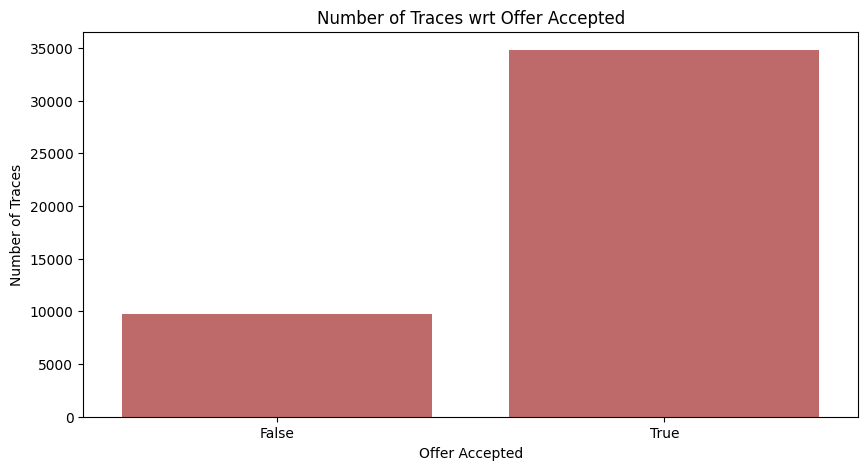

In [227]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
temp = filtered_rows['Accepted'].value_counts()
grid = sns.barplot(x=temp.index, y=temp.values, color ='indianred')


ax.set_xlabel("Offer Accepted")  # set x-axis label
ax.set_ylabel("Number of Traces") # set y-axis label
plt.title('Number of Traces wrt Offer Accepted')

Text(0.5, 1.0, 'Number of Traces wrt Selected')

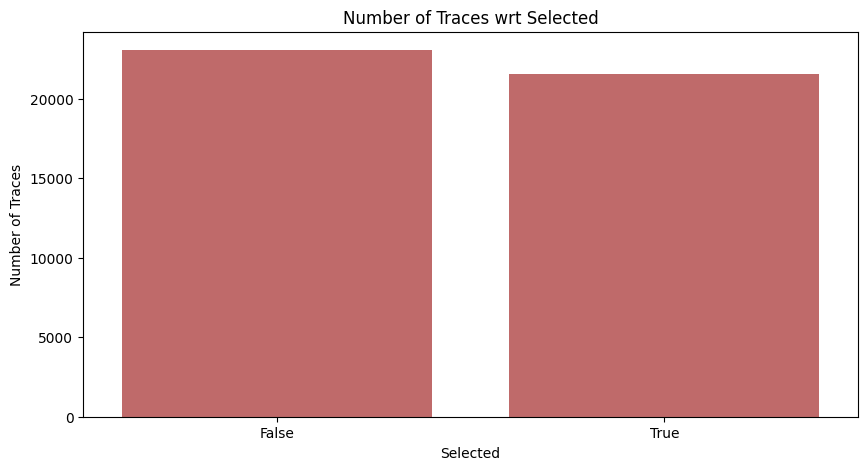

In [226]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
temp = filtered_rows['Selected'].value_counts()
grid = sns.barplot(x=temp.index, y=temp.values, color ='indianred')


ax.set_xlabel("Selected")  # set x-axis label
ax.set_ylabel("Number of Traces") # set y-axis label
plt.title('Number of Traces wrt Selected')

Text(0.5, 1.0, 'Heatmap')

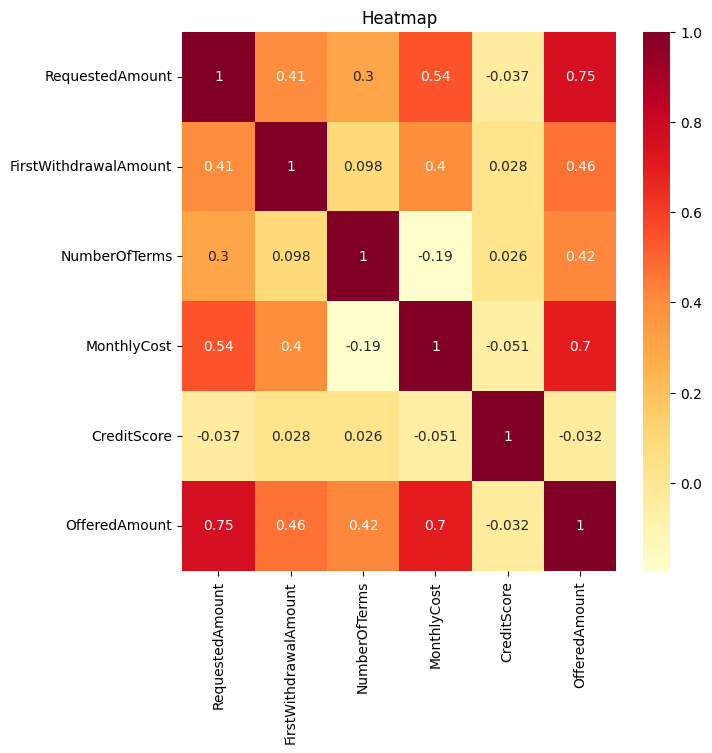

In [230]:
# plotting heat map between numeric variables
fig, ax = plt.subplots(figsize=(7,7)) 
sns.heatmap(num_columns.corr(), annot=True, ax = ax, cmap='YlOrRd')
plt.title('Heatmap')

array([[<AxesSubplot:title={'center':'RequestedAmount'}>,
        <AxesSubplot:title={'center':'FirstWithdrawalAmount'}>],
       [<AxesSubplot:title={'center':'NumberOfTerms'}>,
        <AxesSubplot:title={'center':'MonthlyCost'}>],
       [<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'OfferedAmount'}>]], dtype=object)

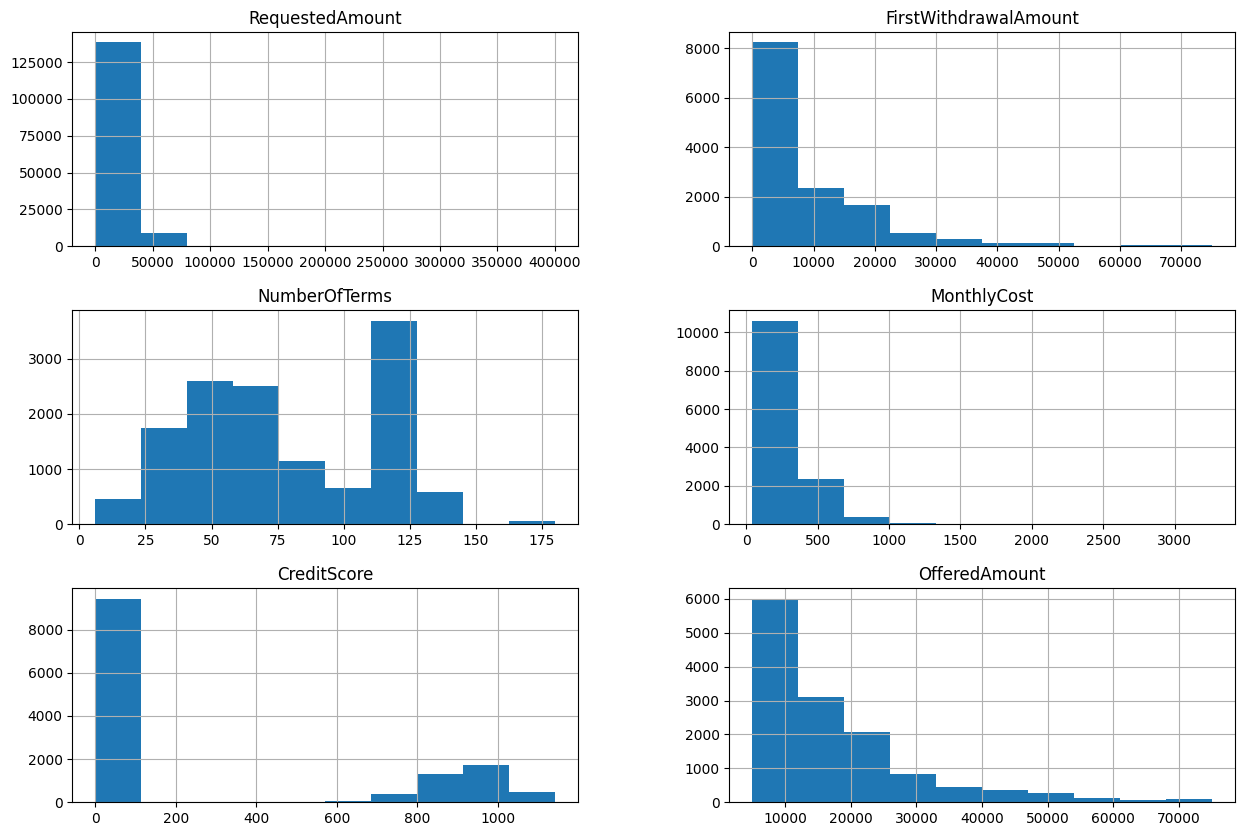

In [236]:
num_columns.hist(figsize=(15,10))

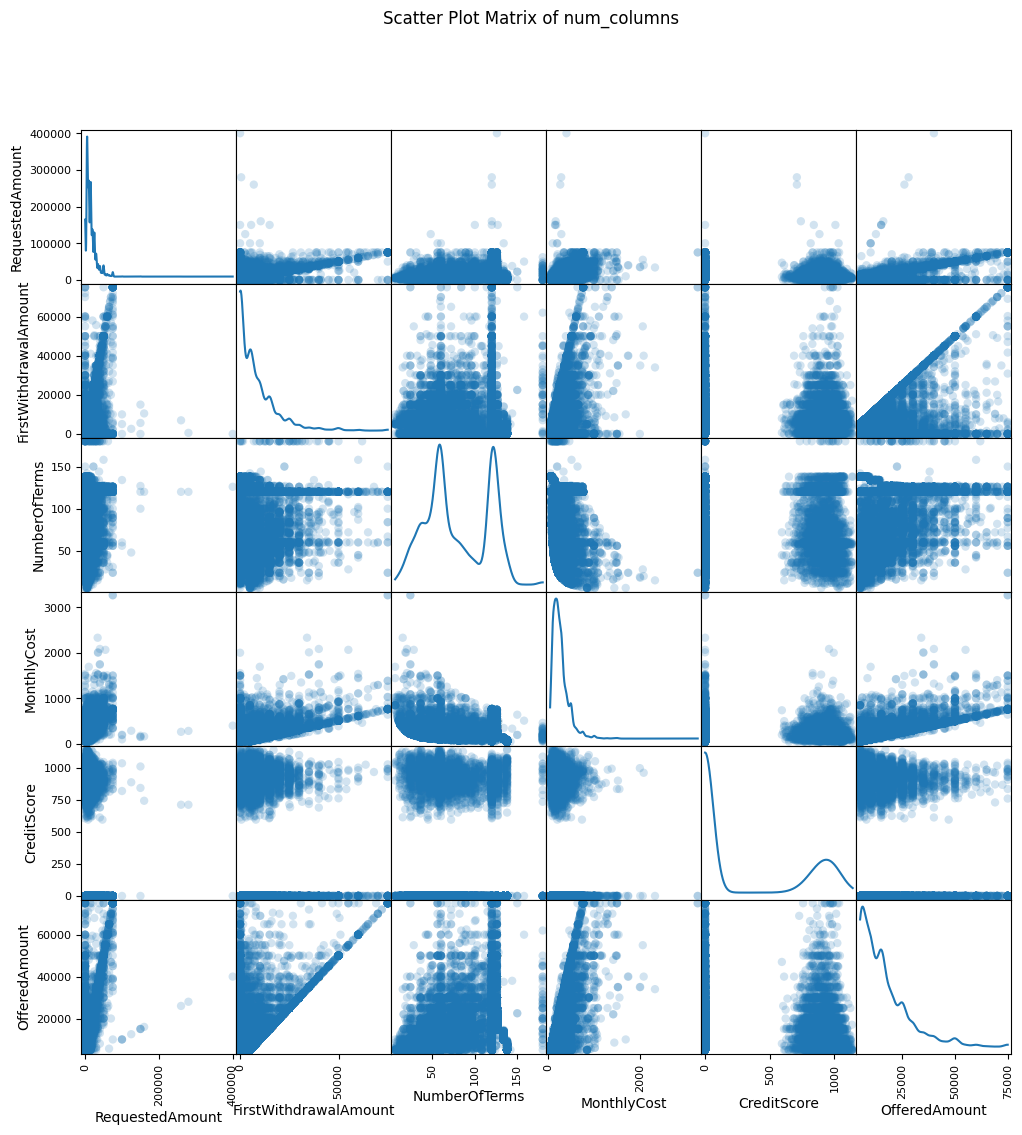

In [237]:
# plot scatter plots
scatter_matrix(num_columns, 
               alpha=0.2, figsize=(12, 12), 
               diagonal='kde', marker='o');
# Add a title to the figure
plt.suptitle("Scatter Plot Matrix of num_columns")

# Show the plot
plt.show()